# GD en el perceptrón

El método de gradiente descendiente es un método de optimización que se basa en observar el gradiente de una función para encontrar el mínimo de esta función. Aquí veremos cómo se puede aplicar este método al perceptrón para que pueda realizar una tarea de clasificación binaria.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

## Preparación de los datos

Usamos datos que representan un problema de clasificación binario. Utilizamos el 70 \% de los datos para el entrenamiento y el 30 para la evaluación.

In [2]:
data = pd.read_csv('cat_data.csv')

#Convertir los datos a numpy
npData = data.to_numpy()
#Ejemplos
X = npData[:,:-1]
#Clases de los ejemplos
Y = npData[:,-1]

#Entrenamiento y evaluación
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

#Tamaño de los datos
#Unidades de entrada
m,n = x_train.shape

#Tamaño de los datos
#Unidades de entrada
m,n = x_train.shape

data

,¿es animal?,¿es mamífero?,¿es felino?,¿es doméstico?,¿tiene dos orejas?,¿es negro?,¿tiene cuatro patas?,¿es gato?
0,1,1,1,1,1,1,1,1
1,0,0,0,1,0,1,0,0
2,1,0,1,0,0,1,1,0
3,1,0,0,0,1,0,1,0
4,1,0,1,0,1,0,1,0
5,1,1,1,1,0,0,0,1
6,1,0,0,1,1,1,0,0
7,1,1,1,1,0,0,1,1
8,1,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0


## Aprendizaje por GD

Usarems el algoritmo de GD con entropía cruzada.

#### Entrenamiento de la red

Determinaremos los pesos a partir del algoritmo de gradiente descendiente:

$$\theta_i \leftarrow \theta_i - \eta \nabla_iR(\theta)$$

En este caso, la función de riesgo es:

$$R(\theta) = -\sum_x \sum_y y \log f_y(x)$$

Donde $y$ es la clase de los datos. Además, la probabilidad se determinará por la función Softmax y $\theta = \{w,b: w \in \mathbb{R}^d, b \in \mathbb{R}\}$. Por tanto:

$$\nabla_iR(\theta) = (f_y(x) - y_x) \cdot x_i$$

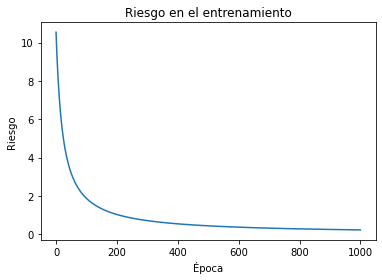

CPU times: user 234 ms, sys: 3.11 ms, total: 237 ms
Wall time: 236 ms


In [3]:
%%time

#Número de itraciones
its = 1000
#Rango de aprendizaje
lr = 0.01

np.random.seed(0)
w = np.random.rand(n,2)/np.sqrt(n)
b = np.ones(2)

#Detenerse
stop = False
t = 0
risk = []
while  stop == False:
    #FORWARD
    #Funcion de preactivacióm
    a = np.dot(x_train,w)+b
    #Función de activación
    exp = np.exp(a)
    f = exp/exp.sum(1, keepdims=True)
    #Risk por época
    epoch_risk = -np.log(f)[range(m),y_train].sum()
    risk.append(epoch_risk)

    #Error
    err = f.copy()
    err[range(m),y_train] -= 1
    
    #Derivada
    dw = np.dot(x_train.T,err)
    db = err.sum(0)
    
    #ACTUALIZACIÓN
    #Gradiente descendiente
    w -= lr*dw
    b -= lr*db
    
    t += 1
    #Criterio de paro
    if t > its: 
        stop = True
        
plt.plot(risk)
plt.title('Riesgo en el entrenamiento')
plt.ylabel('Riesgo')
plt.xlabel('Época')
plt.show()

Aplicación de la red a los datos: La elección de una clase se hace como:

$$\hat{y} = \arg\max_y p(Y=y|x)$$

In [4]:
#Predicción
def forward(X):
    #Pre-activación
    a = np.dot(X,w)+b
    #Activación
    exp = np.exp(a)
    f = exp/exp.sum(1,keepdims=True)
    #Clasificación
    cl = np.argmax(f, axis=1)
    
    return cl, f

In [5]:
#Evaluación
clases, probs = forward(x_test)
print(classification_report(y_test, clases))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         3

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



#### Exploración de los pesos

El perceptrón que hemos definido, determina las probabilidades para la clase 1 (gato) y la clase 0 (no gato) y elige la clase que maximice la probabilidad.

Las probabilidades de salida son:

In [6]:
pd.DataFrame(data=probs, columns=['Prob. clase 0', 'Prob. clase 1'])

,Prob. clase 0,Prob. clase 1
0,0.994770,0.005230
1,0.003917,0.996083
2,0.989086,0.010914
3,0.003436,0.996564
4,0.993682,0.006318
5,0.998278,0.001722
6,0.958119,0.041881
7,0.003917,0.996083


Los pesos de las conexiones que ha aprendido para la clase 1 (gato) son los siguientes:

In [7]:
pd.DataFrame(data=np.append(w[:,1],b[1]), index=list(data.columns)[:7]+['bias'], columns=['Pesos de clase gato'])

,Pesos de clase gato
¿es animal?,0.039926
¿es mamífero?,3.075444
¿es felino?,1.053294
¿es doméstico?,1.763021
¿tiene dos orejas?,0.320388
¿es negro?,-0.440786
¿tiene cuatro patas?,0.044740
bias,-1.253362
